In [ ]:
#import importat libaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation and able to get the prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
#load data set into the pandas framework

dataset = pd.read_csv('/content/academic_dataset.csv')
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
#check the data types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
#check for missing values
print(dataset.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


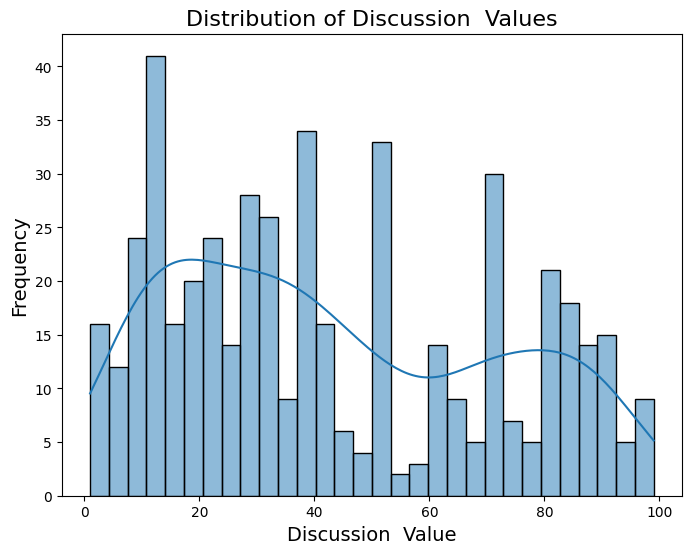

In [ ]:
# Plot the distribution of the pH values
plt.figure(figsize=(8,6))  # Set the figure size
sns.histplot(dataset['Discussion'], bins=30, kde=True)  # kde=True adds the Kernel Density Estimate curve

# Add labels and title
plt.title('Distribution of Discussion  Values', fontsize=16)
plt.xlabel('Discussion  Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# 2. Label Encode Ordinal Features
label_encoder1 = LabelEncoder()

In [ ]:
#encode stage id
dataset['StageID'].value_counts()

,count
StageID,
MiddleSchool,248
lowerlevel,199
HighSchool,33


In [ ]:
dataset['StageID'] = label_encoder1.fit_transform(dataset['StageID'])

In [ ]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,2,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,2,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,2,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,2,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
#encode grade id
dataset['GradeID'].value_counts()

,count
GradeID,
G-02,147
G-08,116
G-07,101
G-04,48
G-06,32
G-11,13
G-12,11
G-09,5
G-10,4


In [ ]:
dataset['GradeID'] = label_encoder1.fit_transform(dataset['GradeID'])

In [ ]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,1,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,2,1,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,2,1,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,2,1,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,2,1,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
#encode class
dataset['Class'].value_counts()

,count
Class,
M,211
H,142
L,127


In [ ]:
dataset['Class'] = label_encoder1.fit_transform(dataset['Class']) #encode the class feature

In [ ]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,1,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,2,1,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,2,1,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,1
3,M,KW,KuwaIT,2,1,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,1
4,M,KW,KuwaIT,2,1,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2


In [ ]:
dataset['ParentschoolSatisfaction'] = label_encoder1.fit_transform(dataset['ParentschoolSatisfaction']) # encode the ParentschoolSatisfaction feature

In [ ]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,1,A,IT,F,Father,15,16,2,20,Yes,1,Under-7,2
1,M,KW,KuwaIT,2,1,A,IT,F,Father,20,20,3,25,Yes,1,Under-7,2
2,M,KW,KuwaIT,2,1,A,IT,F,Father,10,7,0,30,No,0,Above-7,1
3,M,KW,KuwaIT,2,1,A,IT,F,Father,30,25,5,35,No,0,Above-7,1
4,M,KW,KuwaIT,2,1,A,IT,F,Father,40,50,12,50,No,0,Above-7,2


In [ ]:
dataset['StudentAbsenceDays'] = label_encoder1.fit_transform(dataset['StudentAbsenceDays'])

In [ ]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,2,1,A,IT,F,Father,15,16,2,20,Yes,1,1,2
1,M,KW,KuwaIT,2,1,A,IT,F,Father,20,20,3,25,Yes,1,1,2
2,M,KW,KuwaIT,2,1,A,IT,F,Father,10,7,0,30,No,0,0,1
3,M,KW,KuwaIT,2,1,A,IT,F,Father,30,25,5,35,No,0,0,1
4,M,KW,KuwaIT,2,1,A,IT,F,Father,40,50,12,50,No,0,0,2


In [ ]:
#One-Hot Encode Nominal Features

# One-hot encode the 'Gender' column
gender_dummies = pd.get_dummies(dataset['gender'], prefix='gender')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, gender_dummies], axis=1)

# Drop the original 'Gender' column
dataset.drop('gender', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in gender_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()


,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,gender_F,gender_M
0,KW,KuwaIT,2,1,A,IT,F,Father,15,16,2,20,Yes,1,1,2,0,1
1,KW,KuwaIT,2,1,A,IT,F,Father,20,20,3,25,Yes,1,1,2,0,1
2,KW,KuwaIT,2,1,A,IT,F,Father,10,7,0,30,No,0,0,1,0,1
3,KW,KuwaIT,2,1,A,IT,F,Father,30,25,5,35,No,0,0,1,0,1
4,KW,KuwaIT,2,1,A,IT,F,Father,40,50,12,50,No,0,0,2,0,1


In [ ]:
dataset['gender_F'].value_counts()

,count
gender_F,
0,305
1,175


In [ ]:
dataset['gender_M'].value_counts()

,count
gender_M,
1,305
0,175


In [ ]:
# One-hot encode the 'NationalITy' column
natioality_dummies = pd.get_dummies(dataset['NationalITy'], prefix='NationalITy')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, natioality_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('NationalITy', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in natioality_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,...,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela
0,KuwaIT,2,1,A,IT,F,Father,15,16,2,...,1,0,0,0,0,0,0,0,0,0
1,KuwaIT,2,1,A,IT,F,Father,20,20,3,...,1,0,0,0,0,0,0,0,0,0
2,KuwaIT,2,1,A,IT,F,Father,10,7,0,...,1,0,0,0,0,0,0,0,0,0
3,KuwaIT,2,1,A,IT,F,Father,30,25,5,...,1,0,0,0,0,0,0,0,0,0
4,KuwaIT,2,1,A,IT,F,Father,40,50,12,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Select columns that start with 'Gender'
NationalITy_columns = [col for col in dataset.columns if col.startswith('NationalITy')]

# Select these columns from the DataFrame
selected_NationalITy_columns = dataset[NationalITy_columns]

# Display the result
print(selected_NationalITy_columns.head())

   NationalITy_Egypt  NationalITy_Iran  NationalITy_Iraq  NationalITy_Jordan  \
0                  0                 0                 0                   0   
1                  0                 0                 0                   0   
2                  0                 0                 0                   0   
3                  0                 0                 0                   0   
4                  0                 0                 0                   0   

   NationalITy_KW  NationalITy_Lybia  NationalITy_Morocco  \
0               1                  0                    0   
1               1                  0                    0   
2               1                  0                    0   
3               1                  0                    0   
4               1                  0                    0   

   NationalITy_Palestine  NationalITy_SaudiArabia  NationalITy_Syria  \
0                      0                        0                  0   
1       

In [ ]:
# One-hot encode the 'NationalITy' column
PlaceofBirth_dummies = pd.get_dummies(dataset['PlaceofBirth'], prefix='PlaceofBirth')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, PlaceofBirth_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('PlaceofBirth', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in PlaceofBirth_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,...,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela
0,2,1,A,IT,F,Father,15,16,2,20,...,1,0,0,0,0,0,0,0,0,0
1,2,1,A,IT,F,Father,20,20,3,25,...,1,0,0,0,0,0,0,0,0,0
2,2,1,A,IT,F,Father,10,7,0,30,...,1,0,0,0,0,0,0,0,0,0
3,2,1,A,IT,F,Father,30,25,5,35,...,1,0,0,0,0,0,0,0,0,0
4,2,1,A,IT,F,Father,40,50,12,50,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Select columns that start with 'Gender'
PlaceofBirthy_columns = [col for col in dataset.columns if col.startswith('PlaceofBirth')]

# Select these columns from the DataFrame
selected_PlaceofBirthy_columns = dataset[PlaceofBirthy_columns]

# Display the result
print(selected_PlaceofBirthy_columns.head())

   PlaceofBirth_Egypt  PlaceofBirth_Iran  PlaceofBirth_Iraq  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   

   PlaceofBirth_Jordan  PlaceofBirth_KuwaIT  PlaceofBirth_Lybia  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    1                   0   
3                    0                    1                   0   
4                    0                    1                   0   

   PlaceofBirth_Morocco  PlaceofBirth_Palestine  PlaceofBirth_SaudiArabia  \
0                     0                       0                         0   
1                     0                       0                 

In [ ]:
SectionID_dummies = pd.get_dummies(dataset['SectionID'], prefix='SectionID')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, SectionID_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('SectionID', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in SectionID_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,...,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,SectionID_A,SectionID_B,SectionID_C
0,2,1,IT,F,Father,15,16,2,20,Yes,...,0,0,0,0,0,0,0,1,0,0
1,2,1,IT,F,Father,20,20,3,25,Yes,...,0,0,0,0,0,0,0,1,0,0
2,2,1,IT,F,Father,10,7,0,30,No,...,0,0,0,0,0,0,0,1,0,0
3,2,1,IT,F,Father,30,25,5,35,No,...,0,0,0,0,0,0,0,1,0,0
4,2,1,IT,F,Father,40,50,12,50,No,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Topic_dummies = pd.get_dummies(dataset['Topic'], prefix='Topic')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, Topic_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('Topic', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in Topic_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,StageID,GradeID,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
0,2,1,F,Father,15,16,2,20,Yes,1,...,0,0,0,0,0,1,0,0,0,0
1,2,1,F,Father,20,20,3,25,Yes,1,...,0,0,0,0,0,1,0,0,0,0
2,2,1,F,Father,10,7,0,30,No,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,F,Father,30,25,5,35,No,0,...,0,0,0,0,0,1,0,0,0,0
4,2,1,F,Father,40,50,12,50,No,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
Semester_dummies = pd.get_dummies(dataset['Semester'], prefix='Semester')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, Semester_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('Semester', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in Semester_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,StageID,GradeID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S
0,2,1,Father,15,16,2,20,Yes,1,1,...,0,0,0,1,0,0,0,0,1,0
1,2,1,Father,20,20,3,25,Yes,1,1,...,0,0,0,1,0,0,0,0,1,0
2,2,1,Father,10,7,0,30,No,0,0,...,0,0,0,1,0,0,0,0,1,0
3,2,1,Father,30,25,5,35,No,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2,1,Father,40,50,12,50,No,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
Relation_dummies = pd.get_dummies(dataset['Relation'], prefix='Relation')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, Relation_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('Relation', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in Relation_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,StageID,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum
0,2,1,15,16,2,20,Yes,1,1,2,...,0,1,0,0,0,0,1,0,1,0
1,2,1,20,20,3,25,Yes,1,1,2,...,0,1,0,0,0,0,1,0,1,0
2,2,1,10,7,0,30,No,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,2,1,30,25,5,35,No,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,2,1,40,50,12,50,No,0,0,2,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
ParentAnsweringSurvey_dummies = pd.get_dummies(dataset['ParentAnsweringSurvey'], prefix='ParentAnsweringSurvey')

# Concatenate the new one-hot encoded columns to the original DataFrame
dataset = pd.concat([dataset, ParentAnsweringSurvey_dummies], axis=1)

# Drop the original 'NationalITy' column
dataset.drop('ParentAnsweringSurvey', axis=1, inplace=True)

# Convert boolean values (True and False) to binary (1 and 0)
for col in ParentAnsweringSurvey_dummies.columns:
    dataset[col] = dataset[col].astype(int)

# Check the result
dataset.head()

,StageID,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,gender_F,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes
0,2,1,15,16,2,20,1,1,2,0,...,0,0,0,0,1,0,1,0,0,1
1,2,1,20,20,3,25,1,1,2,0,...,0,0,0,0,1,0,1,0,0,1
2,2,1,10,7,0,30,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,2,1,30,25,5,35,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,2,1,40,50,12,50,0,0,2,0,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
#check the data types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   StageID                    480 non-null    int64
 1   GradeID                    480 non-null    int64
 2   raisedhands                480 non-null    int64
 3   VisITedResources           480 non-null    int64
 4   AnnouncementsView          480 non-null    int64
 5   Discussion                 480 non-null    int64
 6   ParentschoolSatisfaction   480 non-null    int64
 7   StudentAbsenceDays         480 non-null    int64
 8   Class                      480 non-null    int64
 9   gender_F                   480 non-null    int64
 10  gender_M                   480 non-null    int64
 11  NationalITy_Egypt          480 non-null    int64
 12  NationalITy_Iran           480 non-null    int64
 13  NationalITy_Iraq           480 non-null    int64
 14  NationalITy_Jordan        

In [ ]:
print(dataset.values.std())

13.776134427460224


In [ ]:
print(dataset['GradeID'].std())

2.4642670741913575


In [ ]:
#Standardize the values

scaler = StandardScaler()

In [ ]:
# Drop both the 'Target' column and the index column (if it’s part of the data)
X = dataset.drop(columns=['Class'])

Y = dataset['Class']#label

In [ ]:
# List of all columns
all_columns = dataset.columns

# List of prefixes or patterns for one-hot encoded columns
one_hot_prefixes = ['gender', 'NationalITy', 'PlaceofBirth', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey']

# Assuming label_encoded_columns contains the list of columns that were label-encoded
label_encoded_prefixes = ['StageID', 'GradeID', 'StudentAbsenceDays', 'Class', 'ParentschoolSatisfaction']

# Identify one-hot encoded columns
one_hot_encoded_columns = [col for col in all_columns if any(col.startswith(prefix) for prefix in one_hot_prefixes)]

print(one_hot_encoded_columns)

['gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'SectionID_A', 'SectionID_B', 'SectionID_C', 'Topic_Arabic', 'Topic_Biology', 'Topic_Chemistry', 'Topic_English', 'Topic_French', 'Topic_Geology', 'Topic_History', 'Topic_IT', 'Topic_Math', 'Topic_Quran', 'Topic_Science', 'Topic_Spanish', 'Semester_F', 'Semester_S', 'Relation_Father', 'Relation_Mum', 'ParentAnsweringSurvey_No', 'ParentAnsweringS

In [ ]:

# Identify one-hot encoded columns
label_encoded_columns = [col for col in all_columns if any(col.startswith(prefix) for prefix in label_encoded_prefixes)]
print(label_encoded_columns)

# Identify non-one-hot encoded columns and label encoded columns
numerical_columns = [col for col in all_columns if col not in one_hot_encoded_columns and col not in label_encoded_columns]

print(numerical_columns)

['StageID', 'GradeID', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']


In [ ]:
scaler.fit(dataset[numerical_columns])

StandardScaler()

In [ ]:
numerical_standardize = scaler.transform(dataset[numerical_columns])

In [ ]:
print(numerical_standardize)

[[-1.03342931 -1.17407456 -1.35116659 -0.84332615]
 [-0.87081258 -1.05302945 -1.31354928 -0.66222533]
 [-1.19604604 -1.44642607 -1.4264012  -0.48112451]
 ...
 [ 0.26750452  0.58107959 -0.48596856 -0.51734468]
 [-0.54557912 -1.14381328 -0.89975892  0.49681992]
 [-0.3829624  -1.23459712 -0.56120318  0.67792074]]


In [ ]:
print(numerical_standardize.std())

1.0


In [ ]:
# Convert the standardized array back to a DataFrame with the same column names
numerical_standardize_df = pd.DataFrame(numerical_standardize, columns=numerical_columns, index=dataset.index)

# Replace the original numerical columns in the dataset with the standardized values
dataset[numerical_columns] = numerical_standardize_df


In [ ]:
print(dataset.head())

   StageID  GradeID  raisedhands  VisITedResources  AnnouncementsView  \
0        2        1    -1.033429         -1.174075          -1.351167   
1        2        1    -0.870813         -1.053029          -1.313549   
2        2        1    -1.196046         -1.446426          -1.426401   
3        2        1    -0.545579         -0.901723          -1.238315   
4        2        1    -0.220346         -0.145191          -0.974994   

   Discussion  ParentschoolSatisfaction  StudentAbsenceDays  Class  gender_F  \
0   -0.843326                         1                   1      2         0   
1   -0.662225                         1                   1      2         0   
2   -0.481125                         0                   0      1         0   
3   -0.300024                         0                   0      1         0   
4    0.243279                         0                   0      2         0   

   ...  Topic_Math  Topic_Quran  Topic_Science  Topic_Spanish  Semester_F  \
0  

In [ ]:
X = dataset.drop(columns=['Class'])

Y = dataset['Class']

In [ ]:
print(X)

     StageID  GradeID  raisedhands  VisITedResources  AnnouncementsView  \
0          2        1    -1.033429         -1.174075          -1.351167   
1          2        1    -0.870813         -1.053029          -1.313549   
2          2        1    -1.196046         -1.446426          -1.426401   
3          2        1    -0.545579         -0.901723          -1.238315   
4          2        1    -0.220346         -0.145191          -0.974994   
..       ...      ...          ...               ...                ...   
475        1        5    -1.358663         -1.537210          -1.238315   
476        1        5     0.104888          0.671863          -0.899759   
477        1        5     0.267505          0.581080          -0.485969   
478        1        5    -0.545579         -1.143813          -0.899759   
479        1        5    -0.382962         -1.234597          -0.561203   

     Discussion  ParentschoolSatisfaction  StudentAbsenceDays  gender_F  \
0     -0.843326         

In [ ]:
print(Y)

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64


In [ ]:
dataset['Class'].value_counts()

,count
Class,
2,211
0,142
1,127


In [ ]:
print(dataset.values.std())

0.687493931475742


In [ ]:
# Assuming X contains features and y contains the target labels
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Assuming your target classes are 0, 1, and 2
Y_train = to_categorical(Y_train, num_classes=3)
Y_val = to_categorical(Y_val, num_classes=3)

In [ ]:
print(Y_train)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
print(Y_val)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1.

In [ ]:
X_train.shape

(384, 59)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Create the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())  # Batch normalization to stabilize training
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer (additional layer for complexity)
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Output layer for multi-class classification (3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='RMSprop',  # Try using RMSprop instead of Adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50,
                    batch_size=64,  # Try increasing batch size to 64
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=8)])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.3914 - loss: 1.2532 - val_accuracy: 0.4479 - val_loss: 1.1009
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5991 - loss: 0.8976 - val_accuracy: 0.5521 - val_loss: 1.0259
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5837 - loss: 0.8735 - val_accuracy: 0.6250 - val_loss: 0.9701
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6122 - loss: 0.8488 - val_accuracy: 0.5625 - val_loss: 0.9309
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6475 - loss: 0.8029 - val_accuracy: 0.5729 - val_loss: 0.9022
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6642 - loss: 0.7512 - val_accuracy: 0.7188 - val_loss: 0.8635
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6814 - loss: 0.7163 - val_accuracy: 0.7396 - val_loss: 0.8470
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7193 - loss: 0.6222 - val_accuracy: 0.6875 - val_loss: 0.8245
Epo

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, Y_val)

# Print validation loss and accuracy
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.5733 
Validation Loss: 0.5118468403816223
Validation Accuracy: 0.78125


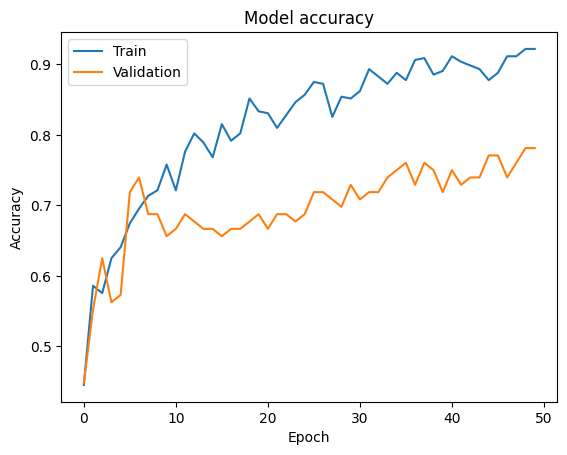

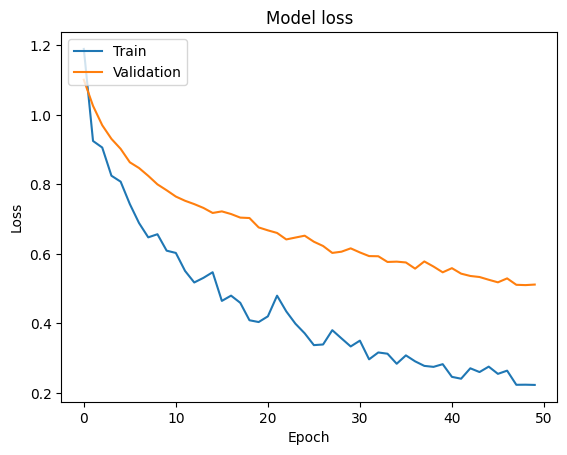

In [ ]:
#Visualizing Training Progress


import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report

# Predict on validation data
y_pred = model.predict(X_val)

# Convert predictions from one-hot to label encoding (if using one-hot encoding)
y_pred_classes = y_pred.argmax(axis=1)

# If you used one-hot encoding for the validation targets, reverse them to label encoding
Y_val_labels = Y_val.argmax(axis=1)

# Generate classification report
print(classification_report(Y_val_labels, y_pred_classes, target_names=['Low', 'Middle', 'High']))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
              precision    recall  f1-score   support

         Low       0.71      0.68      0.70        22
      Middle       0.91      0.77      0.83        26
        High       0.75      0.83      0.79        48

    accuracy                           0.78        96
   macro avg       0.79      0.76      0.77        96
weighted avg       0.79      0.78      0.78        96



In [ ]:
#Hyperparameter Tuning

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to tune batch size and learning rate
def tune_model(batch_size, learning_rate):
    # Create the model
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second hidden layer
    model.add(Dense(64, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third hidden layer (additional layer for complexity)
    model.add(Dense(32, activation='relu'))
    #model.add(BatchNormalization())

    # Output layer
    model.add(Dense(3, activation='softmax'))

    # Compile the model with a custom learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate),  # Use the passed learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Fit the model using the given batch size
    history = model.fit(X_train, Y_train,
                        validation_data=(X_val, Y_val),
                        epochs=50,
                        batch_size=batch_size,  # Use the passed batch size
                        callbacks=[EarlyStopping(patience=6)])  # Early stopping to prevent overfitting

    return history

# Call the function with different combinations of batch size and learning rate
history_1 = tune_model(batch_size=32, learning_rate=0.001)  # Example 1
history_2 = tune_model(batch_size=64, learning_rate=0.0005)  # Example 2
history_3 = tune_model(batch_size=128, learning_rate=0.0001)  # Example 3

# You can plot the history for each tuning attempt to compare results



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3294 - loss: 1.2268 - val_accuracy: 0.5208 - val_loss: 0.9713
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4657 - loss: 0.9965 - val_accuracy: 0.6667 - val_loss: 0.8695
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6043 - loss: 0.8938 - val_accuracy: 0.6875 - val_loss: 0.7826
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5974 - loss: 0.8505 - val_accuracy: 0.6979 - val_loss: 0.7067
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6271 - loss: 0.7662 - val_accuracy: 0.7604 - val_loss: 0.6395
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7027 - loss: 0.6514 - val_accuracy: 0.6979 - val_loss: 0.6134
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6727 - loss: 0.6912 - val_accuracy: 0.7500 - val_loss: 0.5686
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7223 - loss: 0.6316 - val_accuracy: 0.7917 - val_loss: 0.5668
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.2970 - loss: 1.1909 - val_accuracy: 0.4896 - val_loss: 1.0612
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4178 - loss: 1.0879 - val_accuracy: 0.4792 - val_loss: 1.0132
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4276 - loss: 1.0641 - val_accuracy: 0.5000 - val_loss: 0.9813
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3972 - loss: 1.0310 - val_accuracy: 0.5208 - val_loss: 0.9542
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4479 - loss: 1.0298 - val_accuracy: 0.5833 - val_loss: 0.9295
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4837 - loss: 0.9705 - val_accuracy: 0.5938 - val_loss: 0.9022
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5071 - loss: 0.9624 - val_accuracy: 0.6250 - val_loss: 0.8693
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5529 - loss: 0.9285 - val_accuracy: 0.6979 - val_loss: 0.8355
Epoch 9/50
6/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.2839 - loss: 1.2393 - val_accuracy: 0.2917 - val_loss: 1.1294
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2581 - loss: 1.2219 - val_accuracy: 0.2917 - val_loss: 1.1171
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2962 - loss: 1.1919 - val_accuracy: 0.3542 - val_loss: 1.1055
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2559 - loss: 1.1988 - val_accuracy: 0.4062 - val_loss: 1.0943
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2819 - loss: 1.1983 - val_accuracy: 0.4479 - val_loss: 1.0840
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3389 - loss: 1.1532 - val_accuracy: 0.5104 - val_loss: 1.0741
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3271 - loss: 1.1476 - val_accuracy: 0.5312 - val_loss: 1.0645
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3405 - loss: 1.1364 - val_accuracy: 0.5521 - val_loss: 1.0554
Epoch 9/50

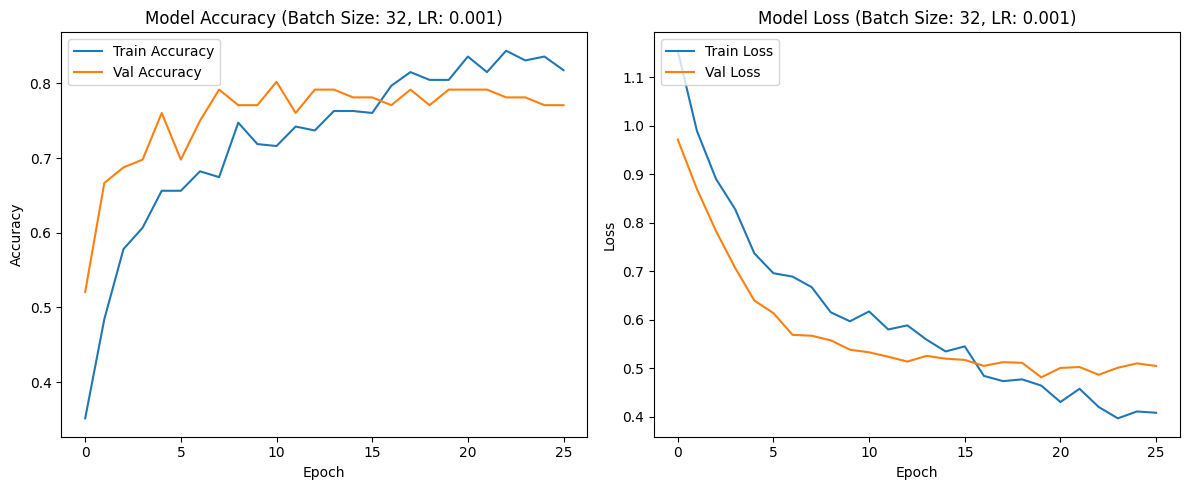

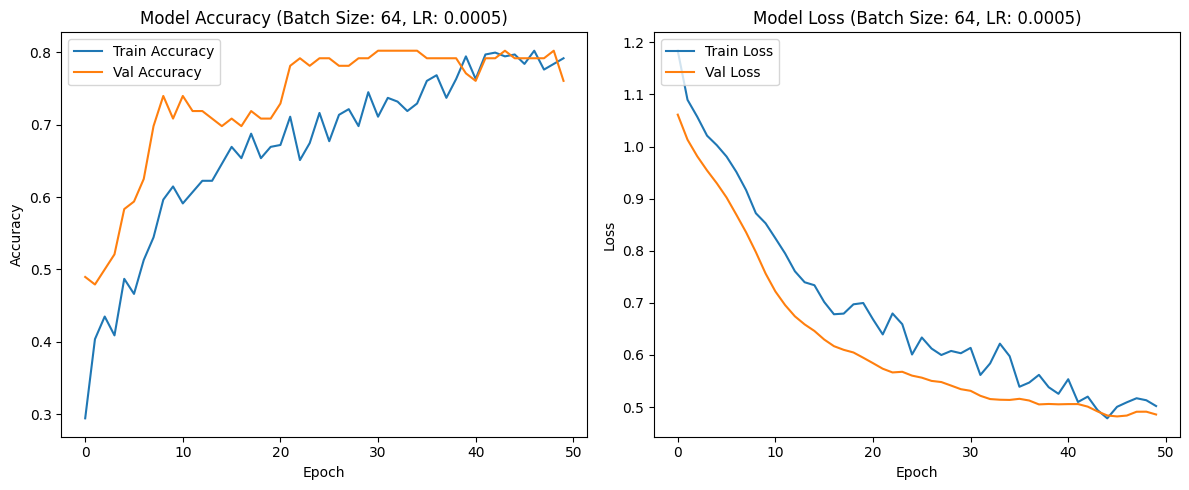

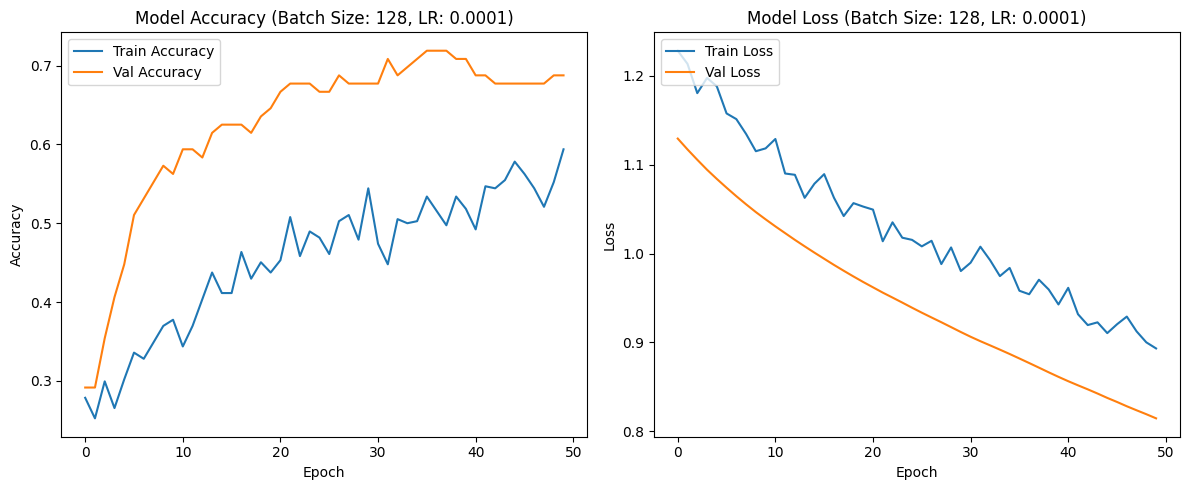

In [ ]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss for each tuning attempt
def plot_history(history, label):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Model Accuracy ({label})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Model Loss ({label})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show the plots
    plt.tight_layout()
    plt.show()

# Plotting for each history object with its respective batch size and learning rate label
plot_history(history_1, label='Batch Size: 32, LR: 0.001')
plot_history(history_2, label='Batch Size: 64, LR: 0.0005')
plot_history(history_3, label='Batch Size: 128, LR: 0.0001')

